In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import sys
sys.path.append("./../pyfiles/")
from util import image_from_numpy

---
In this notebook, I'm going to build a dataset which is for 1st homework. Before you proceed, download the image datasets cited [here](https://www.kaggle.com/zalando-research/fashionmnist). You will get the `archive` folder from this site so after that put it into`Week_05_PyTorch`.

---

In [3]:
data = pd.read_csv("../archive/fashion-mnist_train.csv")

In [4]:
images = data.drop(columns=["label"]).values
images = images.reshape(-1, 28, 28)
included = [0,1,3,4,5,7,8,9]
classes = list(range(len(included)))
labels = data["label"].values

### Stain the images

In [51]:
def make_image_white(image, p=0.5):
    if np.random.choice([0,1], p=(1-p,p)):
        image = np.ones(image.shape, dtype=np.int)*255
    return image
def make_image_black(image, p=0.5):
    if np.random.choice([0,1], p=(1-p,p)):
        image = np.zeros(image.shape, dtype=np.int)
    return image
def add_noise(image, p=0.5, std=50):
    if np.random.choice([0,1], p=(1-p,p)):
        image = image + np.array(np.random.randn(*image.shape)*std, dtype=np.int)
        image[image>=255] = 255
        image[image<=0] = 0
    return image
def shuffle_class(label, p=0.5, max_classes=8):
    if np.random.choice([0,1], p=(1-p,p)):
        label = np.random.randint(max_classes)
    return label
def stain_dataset(functions, ps):
    function = np.random.choice(functions, p=ps)
    return function

In [52]:
functions = [make_image_black, make_image_white, add_noise]
p_function = [1/3,1/3,1/3]
ps = [0.1,0.1,0.1]

In [53]:
new_images = images.copy()
num = new_images.shape[0]
each = 10
for i in range(int(num/each)):
    k = np.random.choice(range(len(ps)), p=p_function)
    for j in range(each):
        index = each*i + j
        new_images[index:index+1] = functions[k](new_images[index:index+1], p=ps[k])

In [54]:
new_labels = labels.copy()
for i in range(len(labels)):
    new_labels[i] = shuffle_class(labels[i], p=0.05)

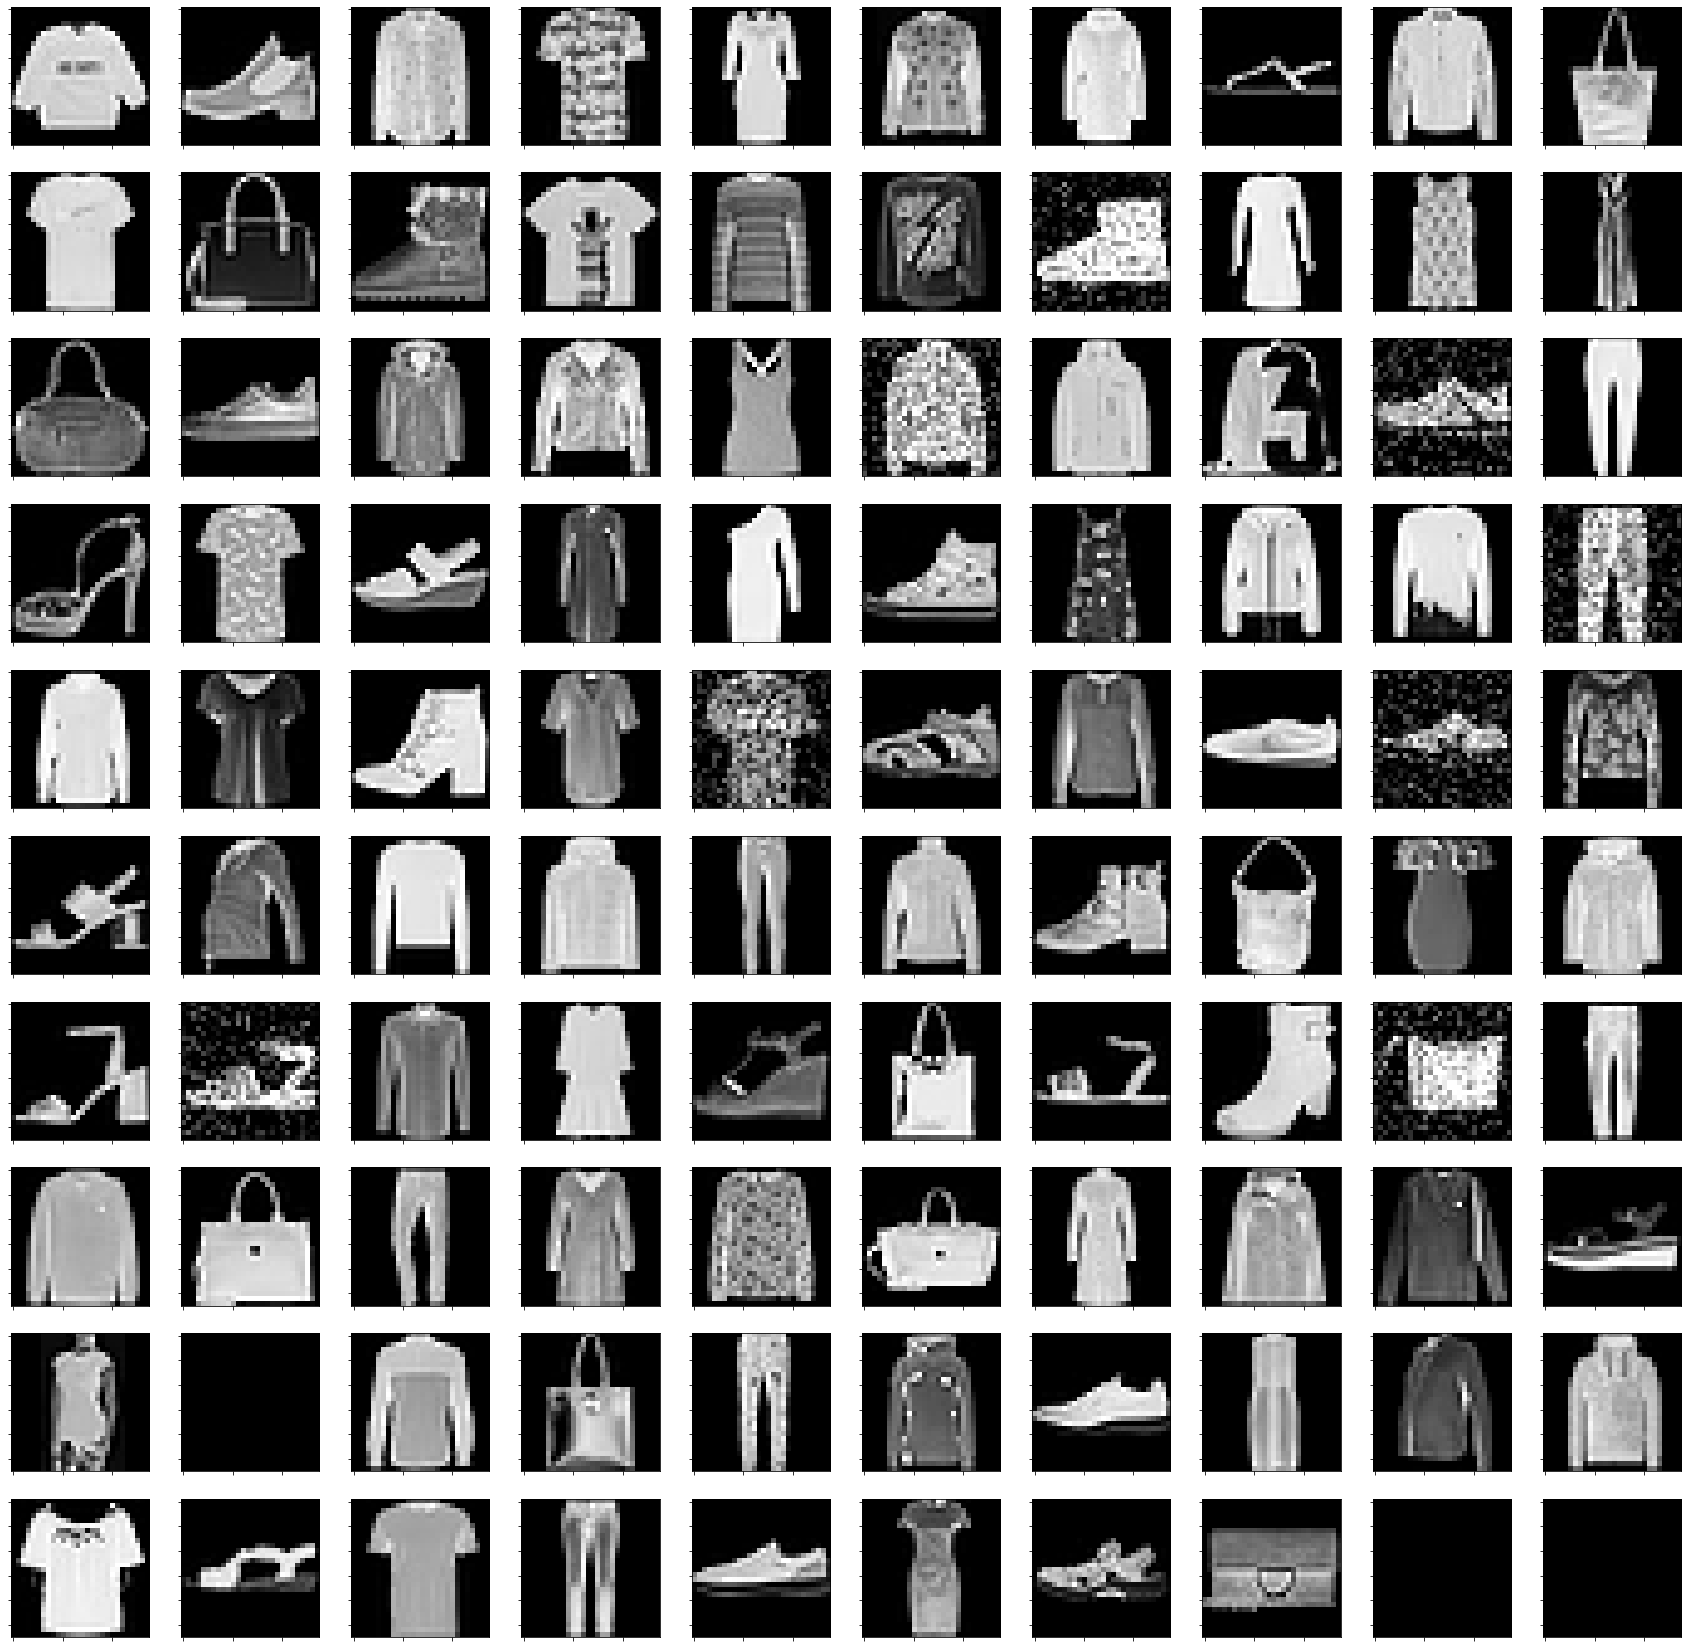

In [55]:
display_num = 100
fig = plt.figure(figsize=(30, 3*int(display_num/10)))
for i in range(display_num):
    ax = fig.add_subplot(int(display_num/10), 10, i+1) 
    img = new_images[i].reshape(1,1,28,28)
    ax.imshow(image_from_numpy(img)[0])
    ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

### Save dataset

In [50]:
dataset_dir = "../fashion_dataset3/"

os.makedirs(dataset_dir, exist_ok=True)
for i in classes:
    path = dataset_dir + str(i)
    os.makedirs(path, exist_ok=True)

In [58]:
for i in classes:
    print(i)
    image_list = image_from_numpy(np.reshape(new_images[new_labels==included[i]], (-1,1,28,28)))
    for j in range(2000):
        path = f"{dataset_dir}{i}/{i}_{str(j).zfill(4)}.png"
        img = image_list[j]
        img.save(path, format="png")

0
1
2
3
4
5
6
7
